In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

#### Probability x Energy

In [3]:
beta = 1
cbm_energy = -0.5
spid_energy = -0.05

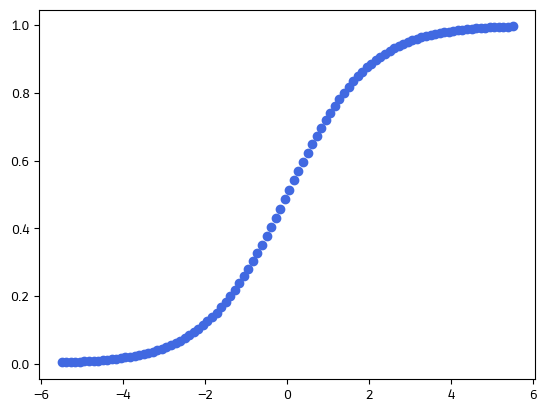

In [4]:
for cbm_count,spid_count in zip(np.linspace(-10,10,100),np.linspace(-10,10,100)):

    E = cbm_count*cbm_energy + spid_count*spid_energy
    P = 1/(1+np.exp(-E))
    plt.scatter(E,P,color='royalblue')

plt.show()

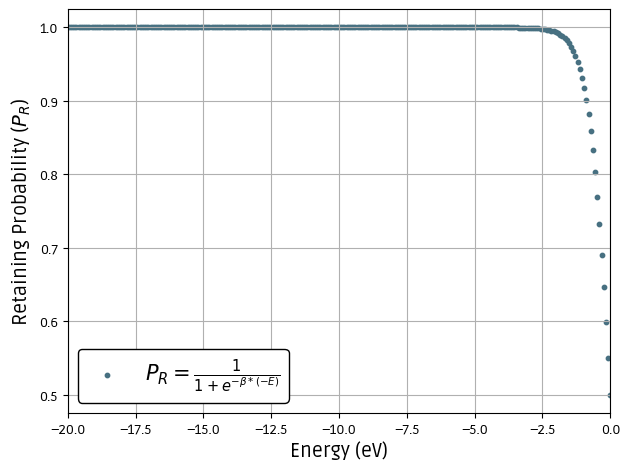

In [10]:
ps,es = [],[]
a = -2.5
b = -2.5

a = 38.92

for E in np.linspace(-20,0,250):

    # P = 1/(1 + np.exp(b*(-E + a)))
    P = 1/(1 + np.exp(b*(-E)))
    
    ps.append(P)
    es.append(E)
    
# plt.scatter(es,ps,color='#477081',s=10,label=r'$ P_{R} = \frac{1}{1 + e^{-\beta*(-E - a)}}$')
plt.scatter(es,ps,color='#477081',s=10,label=r'$ P_{R} = \frac{1}{1 + e^{-\beta*(-E)}}$')

# plt.vlines(x=a,ymin=0,ymax=1,color='gray',linestyle='--',label='$a$')

plt.xlim(min(es),max(es))
# plt.ylim(min(ps),max(ps))

plt.xlabel('Energy (eV)',fontsize=14),plt.ylabel('Retaining Probability ($P_R$)',fontsize=14)
plt.legend(fontsize=15,edgecolor='black',framealpha=1,loc='lower left')
plt.grid(),plt.tight_layout()
# plt.savefig('results/sig.png',transparent=True,dpi=500)
plt.show()

#### Fiber creation

In [47]:
import numpy as np
import random
import matplotlib.pyplot as plt

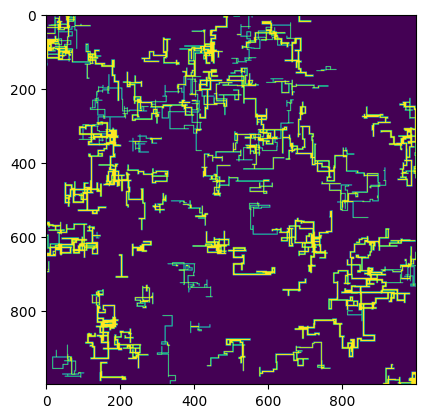

In [2]:
import numpy as np
import random

def criar_malha(dim, porosidade, diametro_max):
    matriz = np.zeros((dim, dim), dtype=int)    
    num_fibras = max(0, int((1 - porosidade) * dim))
    
    def adicionar_fibra(diametro):
        x, y = random.randint(0, dim-1), random.randint(0, dim-1)
        
        direcao = random.choice(['N', 'S', 'L', 'O'])
        
        for _ in range(random.randint(5, dim)):
            for dx in range(-diametro//2, diametro//2 + 1):
                for dy in range(-diametro//2, diametro//2 + 1):
                    if 0 <= x + dx < dim and 0 <= y + dy < dim:
                        matriz[x + dx, y + dy] = 1
            
            if direcao == 'N':
                x = max(0, x - 1)
            elif direcao == 'S':
                x = min(dim-1, x + 1)
            elif direcao == 'L':
                y = min(dim-1, y + 1)
            elif direcao == 'O':
                y = max(0, y - 1)
            
            if random.random() < 0.1:
                direcao = random.choice(['N', 'S', 'L', 'O'])

    for _ in range(num_fibras):
        diametro = random.randint(1, diametro_max)
        adicionar_fibra(diametro)
    
    return matriz

dim = 1000
porosidade = 0.9
diametro_max = 4
malha = criar_malha(dim, porosidade, diametro_max)
plt.imshow(malha)

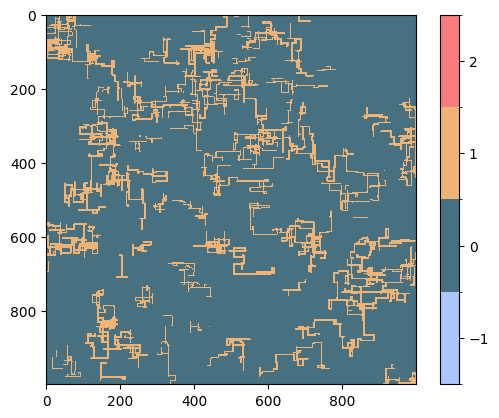

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

data = np.array([[0, 1, 2, -1],
                 [2, 0, -1, 1],
                 [1, 2, 0, -1]])

colors = ['#AEC5FB', '#477081', '#EFB475', '#F77B7F']

cmap = ListedColormap(colors)

bounds = [-1.5, -0.5, 0.5, 1.5, 2.5]
norm = BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
cax = ax.imshow(malha, cmap=cmap, norm=norm)

fig.colorbar(cax, ticks=[-1, 0, 1, 2])

# Exibir o gráfico
plt.show()

#### System Study

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.layers import filter_creation

In [10]:
set(list(np.array(filtro).flatten()))

{-1, 0, 2}

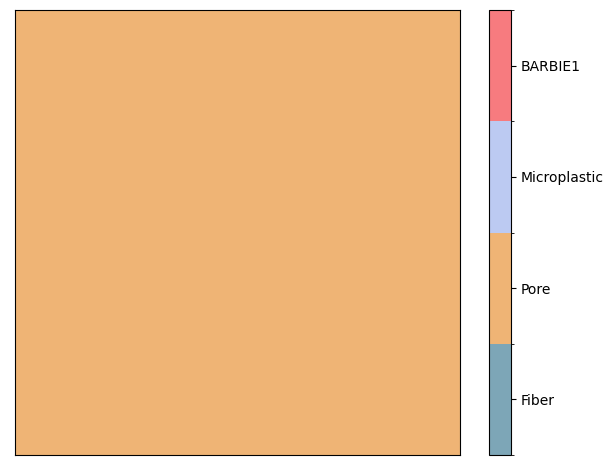

Filtro criado, 0.22


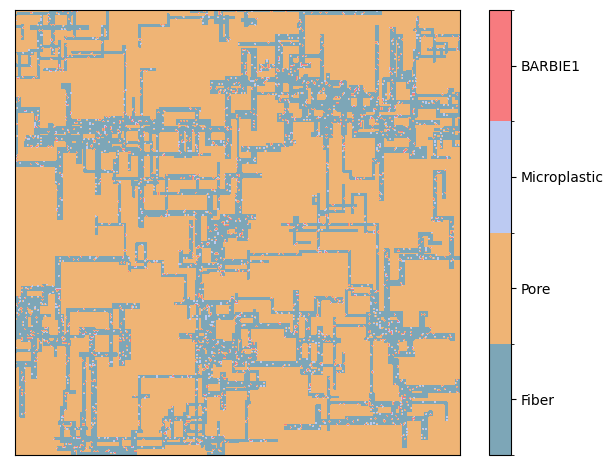

Filtro criado, 0.33


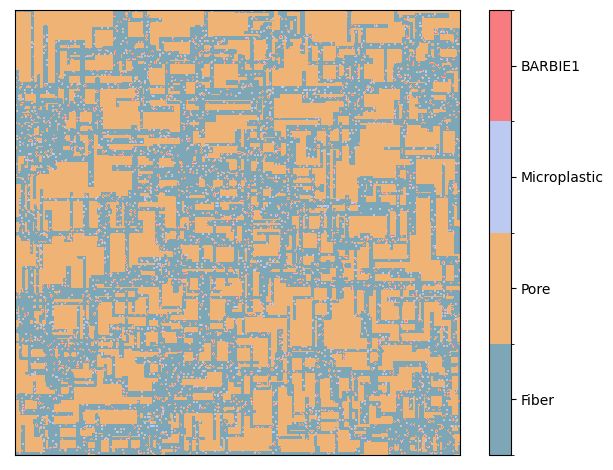

Filtro criado, 0.5


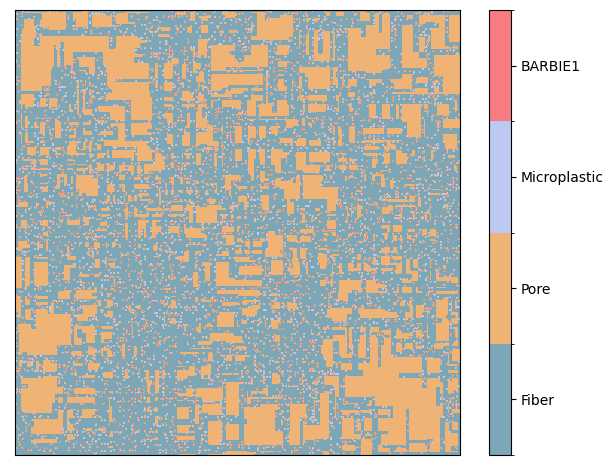

Filtro criado, 0.54


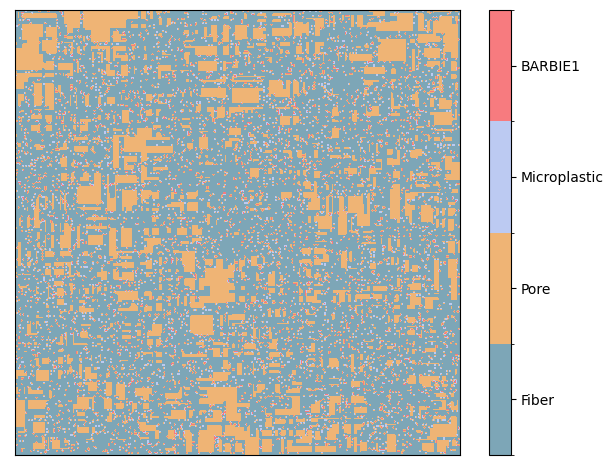

Filtro criado, 0.63


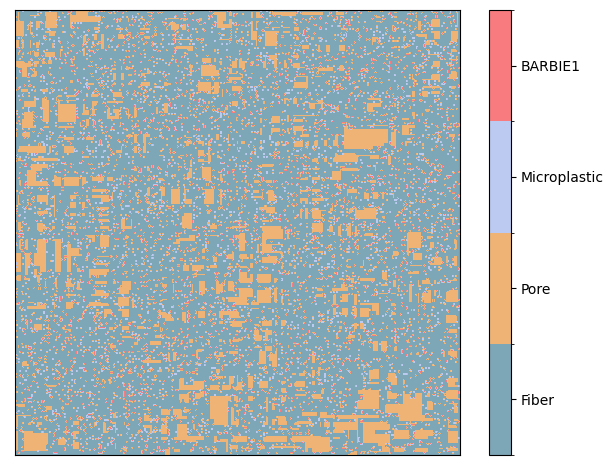

Filtro criado, 0.86


In [3]:
for por in [0,0.2,0.4,0.6,0.8,1]:

    filtro = filter_creation(tamanho_rede = 300,
                    porosidade = por,
                    camadas = 1,
                    diametro_fibra = 3,
                    concentracao_cbm = 0.1,
                    tamanho_cbm = 1,
                    CBM=True,
                    display=True)

#### Rep

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

[-1, 2, 0, 0, 0]
[0, -1, 0, 0, 0]
[0, -1, 2, -1, -1]
[0, 0, 0, 0, 2]
[0, 0, 0, 0, -1]

-1 fibra
0 poro
1 mp
2 BABRIE1


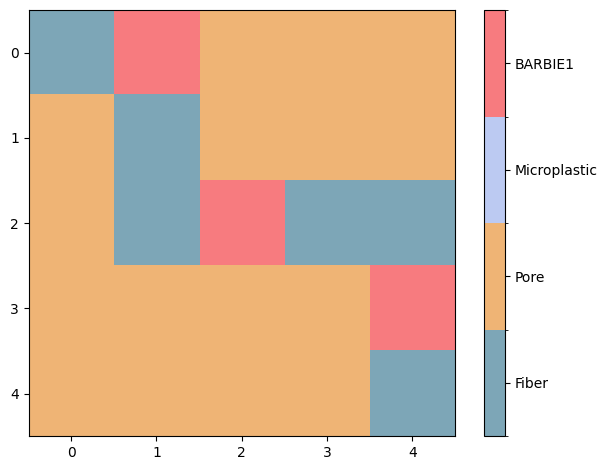

In [27]:
m = [
    [-1,2,0,0,0],
    [0,-1,0,0,0],
    [0,-1,2,-1,-1],
    [0,0,0,0,2],
    [0,0,0,0,-1],
]

colors = ['#7DA6B7', '#EFB475', '#BCCAF2', '#F77B7F']

cmap = ListedColormap(colors)

bounds = [-1.5, -0.5, 0.5, 1.5, 2.5]
norm = BoundaryNorm(bounds, cmap.N)

cax = plt.imshow(m, cmap=cmap, norm=norm)
cbar = plt.colorbar(cax, ticks=[-1,0,1,2])
cbar.set_ticklabels(['Fiber', 'Pore', 'Microplastic', 'BARBIE1'])

plt.tight_layout()
plt.savefig('results/matrix_rep.png',dpi=500,transparent=True)

for mi in (m):
    print(mi)

print()
print(-1,'fibra')
print(0,'poro')
print(1,'mp')
print(2,'BABRIE1')